In [ ]:
# try to mount google colab
import os
try:
    from google.colab import drive
    drive.mount('/content/drive')
    print("Mounted Google Drive!")
except:
    print("Not running on Colab. Skipping mount.")

# Phân tích dữ liệu bệnh tiểu đường (Pima Indians Diabetes)

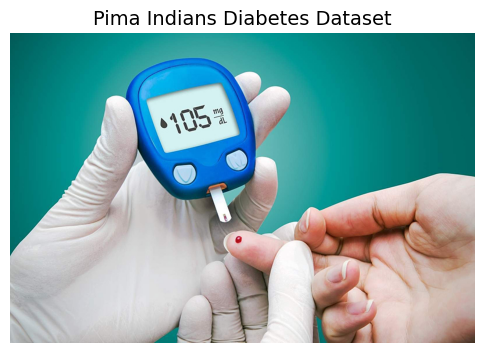

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

# minh họa chủ đề bệnh tiểu đường
image1 = Image.open("dia.jpg")  # icon diabetes
plt.figure(figsize=(6,6))
plt.imshow(image1)
plt.axis('off')
plt.title("Pima Indians Diabetes Dataset", fontsize=14)
plt.show()

## 1. Định nghĩa vấn đề (Define Problem)

Bộ dữ liệu Pima Indians Diabetes chứa các thông tin y tế cơ bản của phụ nữ thuộc dân tộc da đỏ Pima, được thu thập nhằm hỗ trợ việc nghiên cứu và dự đoán nguy cơ mắc bệnh tiểu đường.

**Mục tiêu** của bài toán là dự đoán xem một người có khả năng mắc bệnh tiểu đường hay không dựa trên các chỉ số sức khỏe được cung cấp.

Loại bài toán: Phân loại nhị phân (Binary Classification)

Biến đầu vào: 
- **Pregnancies**: Số lần mang thai của người phụ nữ  
- **Glucose**: Nồng độ glucose trong huyết tương sau 2 giờ làm xét nghiệm dung nạp glucose (Oral Glucose Tolerance Test) (mg/dL)  
- **BloodPressure**: Huyết áp tâm trương (Diastolic Blood Pressure) (mm Hg)  
- **SkinThickness**: Độ dày nếp gấp da (Triceps skin fold thickness) (mm)  
- **Insulin**: Nồng độ insulin trong huyết thanh sau 2 giờ (µU/mL)  
- **BMI**: Chỉ số khối cơ thể (Body Mass Index) = cân nặng / (chiều cao²)  
- **DiabetesPedigreeFunction**: Hàm phả hệ tiểu đường – ước lượng khả năng mắc bệnh dựa trên tiền sử gia đình
- **Age**: Tuổi của người phụ nữ  

Biến đầu ra:

- **Outcome**: Biến mục tiêu – thể hiện kết quả chẩn đoán tiểu đường (0 = No, 1 = Yes).

Tổng số thuộc tính: 9 (gồm 8 biến đầu vào và 1 biến đầu ra)

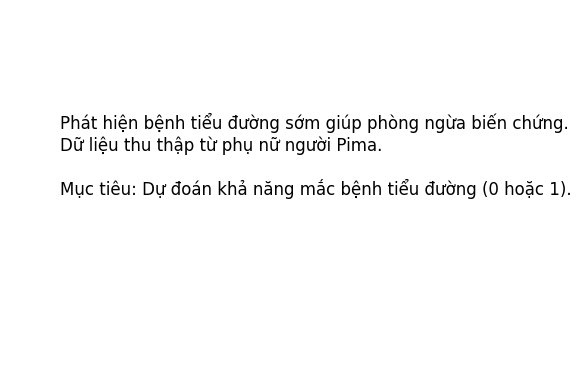

In [6]:
plt.text(0.1, 0.5,
         'Phát hiện bệnh tiểu đường sớm giúp phòng ngừa biến chứng.\n'
         'Dữ liệu thu thập từ phụ nữ người Pima.\n\n'
         'Mục tiêu: Dự đoán khả năng mắc bệnh tiểu đường (0 hoặc 1).',
         fontsize=12)
plt.axis('off')
plt.show()

## 2. Chuẩn bị vấn đề (Prepare Problem)

### 2.1 Khai báo thư viện (Load Libraries)

In [11]:
# Load libraries
import os, sys
import numpy as np
import pandas as pd
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import warnings

%matplotlib inline
# plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100

warnings.filterwarnings("ignore")

### 2.2 Nạp dữ liệu (Load Dataset)

In [8]:
# Load dataset
data_path = "../data/pima-indians-diabetes.csv"
data_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
              "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

df = pd.read_csv(data_path, names=data_names, header=0)
print("Kích thước dữ liệu:", df.shape)
df.head()

Kích thước dữ liệu: (767, 9)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  \
0            1       85             66             29        0  26.6                     0.351   
1            8      183             64              0        0  23.3                     0.672   
2            1       89             66             23       94  28.1                     0.167   
3            0      137             40             35      168  43.1                     2.288   
4            5      116             74              0        0  25.6                     0.201   

   Age  Outcome  
0   31        0  
1   32        1  
2   21        0  
3   33        1  
4   30        0

## 3. Phân tích dữ liệu (Data Analysis)

### 3.1. Thống kê mô tả (Descriptive Statistics) - Ungraphic Approach

**(1) Hiển thị một số thông tin về dữ liệu**
- Số dòng, số cột của dữ liệu
- Kiểu dữ liệu của từng cột
- 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
- Thông tin chung về dữ liệu

In [24]:
# shape
print(f'+ Shape: {df.shape}')
# types
print(f'+ Data Types: \n{df.dtypes}')
# head, tail
print(f'+ Contents: ')
display.display(df.head(5))
display.display(df.tail(5))
# info
df.info()

+ Shape: (767, 9)
+ Data Types: 
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
+ Contents: 


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  \
0            1       85             66             29        0  26.6                     0.351   
1            8      183             64              0        0  23.3                     0.672   
2            1       89             66             23       94  28.1                     0.167   
3            0      137             40             35      168  43.1                     2.288   
4            5      116             74              0        0  25.6                     0.201   

   Age  Outcome  
0   31        0  
1   32        1  
2   21        0  
3   33        1  
4   30        0

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  \
762           10      101             76             48      180  32.9                     0.171   
763            2      122             70             27        0  36.8                     0.340   
764            5      121             72             23      112  26.2                     0.245   
765            1      126             60              0        0  30.1                     0.349   
766            1       93             70             31        0  30.4                     0.315   

     Age  Outcome  
762   63        0  
763   27        0  
764   30        0  
765   47        1  
766   23        0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Nhận xét**
- Dữ liệu có 8 thuộc tính đầu vào gồm: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction và Age.
- Các thuộc tính chủ yếu là các chỉ số y tế định lượng (số học), được đo bằng các đơn vị như mg/dL, mmHg, mm, kg/m²,...
- Tổng số dòng dữ liệu là 768 dòng (mỗi dòng tương ứng với một bệnh nhân nữ).
- Thuộc tính dùng để phân lớp là cột Outcome, biểu thị khả năng mắc bệnh tiểu đường (1 = có, 0 = không).

**(2) Kiểm tra tính toàn vẹn của dữ liệu**
- Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.
- Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
- Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.

In [26]:
print("="*5, "Checking Null", "="*5)
display.display(df.isnull().sum())
has_null = df.isnull().sum().any()
print(f'--> Có giá trị Null: {has_null}')
if has_null:
    display.display(df[df.isnull().any(axis=1)])

===== Checking Null =====


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

--> Có giá trị Null: False


In [27]:
print("="*5, "Checking NaN", "="*5)
display.display(df.isna().sum())
has_nan  = df.isna().sum().any()
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    display.display(df[df.isna().any(axis=1)])

===== Checking NaN =====


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

+ Có giá trị Nan: False


In [30]:
print("="*5, "Checking Duplicated", "="*5)
n_duplicated = df.duplicated(keep = False).sum()
print(f'+ Số dòng trùng: {n_duplicated}')
display.display(df[df.duplicated(keep = False)])
if n_duplicated>0:
    print("+ Số dòng loại bỏ: %d"%(len(df[df.duplicated(keep = "first")])))
    display.display(df[df.duplicated(keep = "first")])

===== Checking Duplicated =====
+ Số dòng trùng: 0


Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []

**Nhận xét**
- Dữ liệu không có dòng nào bị trùng
- Dữ liệu không có giá trị rỗng (NaN, Null)

**(3) Các tính chất thống kê trên dữ liệu số**
- Count, Mean, Standard Deviation, Minimum Value
- 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

In [31]:
description = df.describe().T
display.display(description)

count        mean         std     min      25%      50%      75%     max
Pregnancies               767.0    3.842243    3.370877   0.000   1.0000    3.000    6.000   17.00
Glucose                   767.0  120.859192   31.978468   0.000  99.0000  117.000  140.000  199.00
BloodPressure             767.0   69.101695   19.368155   0.000  62.0000   72.000   80.000  122.00
SkinThickness             767.0   20.517601   15.954059   0.000   0.0000   23.000   32.000   99.00
Insulin                   767.0   79.903520  115.283105   0.000   0.0000   32.000  127.500  846.00
BMI                       767.0   31.990482    7.889091   0.000  27.3000   32.000   36.600   67.10
DiabetesPedigreeFunction  767.0    0.471674    0.331497   0.078   0.2435    0.371    0.625    2.42
Age                       767.0   33.219035   11.752296  21.000  24.0000   29.000   41.000   81.00
Outcome                   767.0    0.348110    0.476682   0.000   0.0000    0.000    1.000    1.00

**Nhận xét**

- Các thuộc tính đầu vào có giá trị số thực và đơn vị đo khác nhau.
- Các giá trị của từng thuộc tính nằm trong khoảng hợp lý, không có giá trị âm.
- Phạm vi biến thiên giữa các thuộc tính khá khác nhau, cho thấy cần chuẩn hóa dữ liệu (scaling) trước khi huấn luyện mô hình.

**(4) Tần số xuất hiện (Distribution) trên dữ liệu phân lớp (Class) và dữ liệu danh mục (Category)**
- Đối với bài toán phân loại nhị phân (binary classification), chúng ta cần xem xét tần suất xuất hiện của các giá trị trong thuộc tính phân lớp **Outcome**. Điều này là cần thiết cho vấn đề mất cân bằng (highly imbalanced problems) giữa các lớp nhằm cần xử lý đặc biệt trong bước chuẩn bị dữ liệu.

In [33]:
df["Outcome"].value_counts()

Outcome
0    500
1    267
Name: count, dtype: int64

**Nhận xét**
- Dữ liệu cần phân loại gồm 2 nhóm kết quả trong cột Outcome:
    - 0: Người không mắc bệnh tiểu đường
    -1: Người mắc bệnh tiểu đường
- Số lượng giữa hai lớp không cân bằng — lớp 0 chiếm tỉ lệ cao hơn so với lớp 1.

**(5) Mối tương quan giữa các tính chất (Correlations)**
- Sự tương quan (correlation) đề cập đến mối quan hệ giữa hai biến và cách chúng có thể có hoặc không cùng nhau thay đổi.
- Phương pháp phổ biến nhất để tính toán tương quan là Pearson's Correlation Coeficient, giả định có một phân phối chuẩn của các thuộc tính liên quan. Tương quan -1 hoặc 1 cho thấy mối tương quan âm hoặc dương đầy đủ tương ứng. Trong khi giá trị 0 hiển thị không tương quan ở tất cả.

$$
r = \frac{\sum_{i=1}^{n} (x_i - \hat{x})(y_i - \hat{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \hat{x})^2 \sum_{i=1}^{n} (y_i - \hat{y})^2}}
$$


- Một số thuật toán học máy như hồi quy tuyến tính và logistic có hiệu suất kém nếu có các thuộc tính tương quan cao trong tập dữ liệu của bạn.
- Như vậy, thật sự cần thiết để xem xét tất cả các mối tương quan theo cặp của các thuộc tính trong tập dữ liệu.

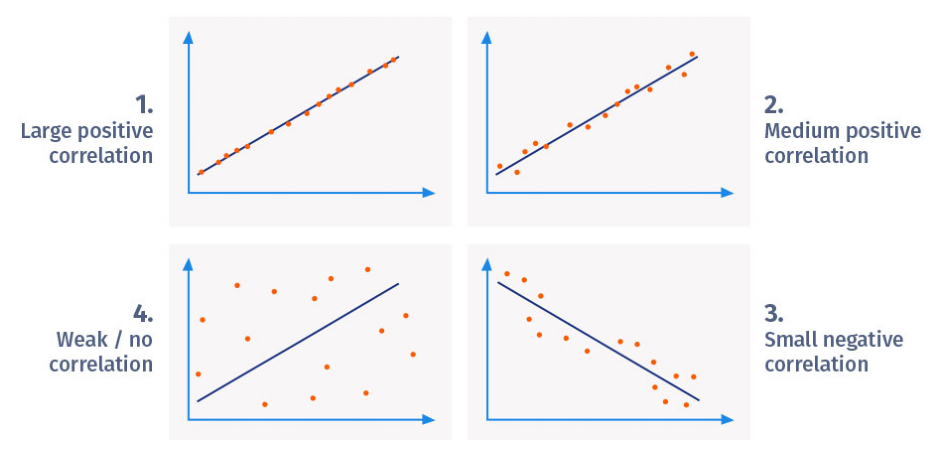

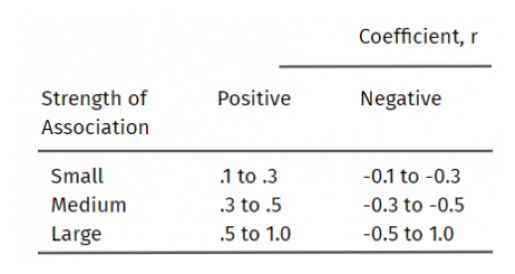

In [36]:
plt.figure(figsize=(12, 6));
plt.imshow(plt.imread("corr1.png")), plt.axis("off"), plt.show();
plt.imshow(plt.imread("corr2.png")), plt.axis("off"), plt.show();

In [37]:
correlations = df.corr(method='pearson')
display.display(correlations)

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
Pregnancies                  1.000000  0.128846       0.141197      -0.082495 -0.072999  0.017518   
Glucose                      0.128846  1.000000       0.152498       0.056381  0.332383  0.220955   
BloodPressure                0.141197  0.152498       1.000000       0.207308  0.089098  0.281777   
SkinThickness               -0.082495  0.056381       0.207308       1.000000  0.437974  0.392553   
Insulin                     -0.072999  0.332383       0.089098       0.437974  1.000000  0.198111   
BMI                          0.017518  0.220955       0.281777       0.392553  0.198111  1.000000   
DiabetesPedigreeFunction    -0.033927  0.136903       0.041180       0.183498  0.185579  0.140546   
Age                          0.544018  0.262408       0.239571      -0.115873 -0.040942  0.035911   
Outcome                      0.221087  0.465856       0.064882       0.073265  0.131984  0.292695   

                          DiabetesPedigreeFunction       Age   Outcome  
Pregnancies                              -0.033927  0.544018  0.221087  
Glucose                                   0.136903  0.262408  0.465856  
BloodPressure                             0.041180  0.239571  0.064882  
SkinThickness                             0.183498 -0.115873  0.073265  
Insulin                                   0.185579 -0.040942  0.131984  
BMI                                       0.140546  0.035911  0.292695  
DiabetesPedigreeFunction                  1.000000  0.032738  0.173245  
Age                                       0.032738  1.000000  0.236417  
Outcome                                   0.173245  0.236417  1.000000

**Nhận xét**
- Các cặp tính chất có độ tương đồng cao:
    - (Prenancies, Age) = 0.544
    - (Glucose, Outcome) = 0.466
    - (SkinThickness, Insulin) = 0.438

### 3.2. Hiển thị dữ liệu (Visualize Data) - Graphic Approach

#### (1) Hiển thị trên từng tính chất đơn (Univariate Plots)

Species (Outcome Label)

Outcome
0    500
1    267
Name: count, dtype: int64


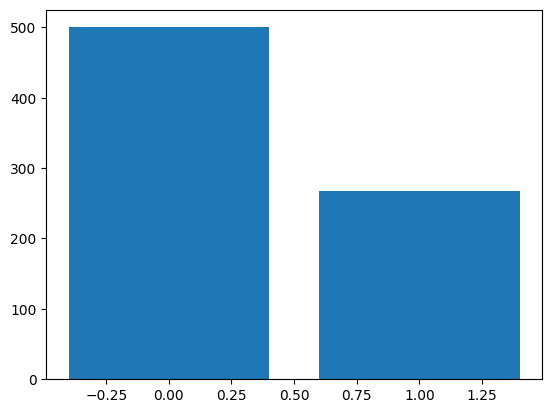

In [40]:
# bar chart
counts = df["Outcome"].value_counts()
plt.bar(counts.index, counts.values)
print(counts)

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 267.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

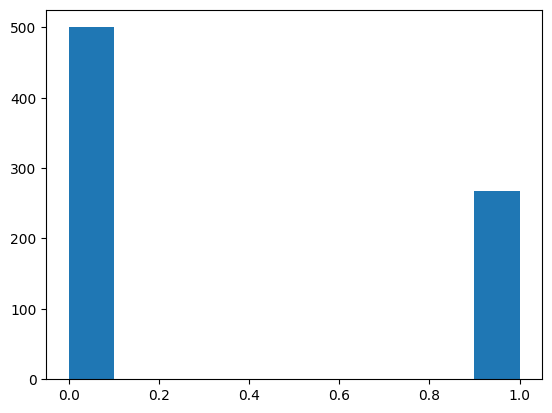

In [41]:
# one way using histogram :)
plt.hist(df['Outcome'])

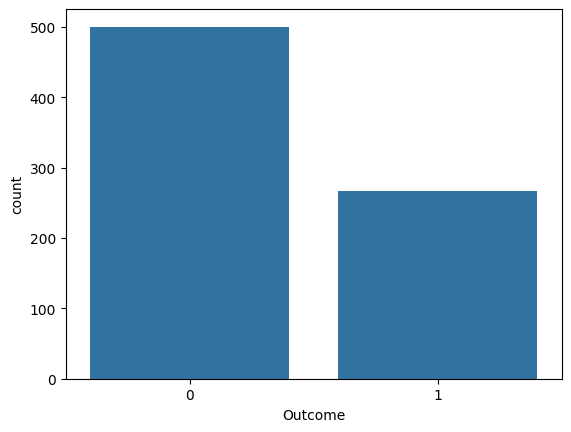

In [42]:
# seaborn
sns.countplot(x = df['Outcome']);

**Nhận xét**
- Tập dữ liệu Pima Indians Diabetes gồm hai lớp kết quả, tuy nhiên số lượng hai lớp không cân bằng: lớp 0 chiếm đa số, trong khi lớp 1 ít hơn đáng kể. 

**Do đó:**
- Cần xem xét các chỉ số đánh giá phù hợp như Precision, Recall, F1-score thay vì chỉ dựa vào Accuracy.
- Có thể cần các bước tiền xử lý để khắc phục mất cân bằng dữ liệu như oversampling (tăng dữ liệu thiểu số), undersampling (giảm dữ liệu đa số), hoặc sử dụng thuật toán cân bằng trọng số lớp.

**Box and whisker plots**
- https://www.simplypsychology.org/boxplots.html
- So sánh các trung vị (median) tương ứng của mỗi ô hộp (box plot). Nếu đường trung vị của một ô hộp nằm bên ngoài ô của một ô hộp so sánh, thì có thể có sự khác biệt giữa hai nhóm.
- So sánh chiều dài hộp để kiểm tra cách dữ liệu được phân tán giữa mỗi mẫu. Hộp càng dài thì dữ liệu càng phân tán. Dữ liệu càng nhỏ càng ít bị phân tán.
- Một ngoại lệ (outlier) được định nghĩa là một điểm dữ liệu nằm bên ngoài phần rìa (whiskers) của ô hộp.
- Kiểm tra hướng lệch của dữ liệu (cân đối, các phần tử tập trung trái, phải).
    - Median ở giữa hộp và râu (whiskers) ở hai bên như nhau thì phân bố là đối xứng.
    - Median ở gần đáy hộp hơn và nếu râu ngắn hơn ở đầu dưới của hộp, thì phân phối là lệch dương (lệch phải).
    - Median ở gần đầu hộp hơn và nếu râu ngắn hơn ở đầu trên của hộp, thì phân bố bị lệch âm (lệch trái).

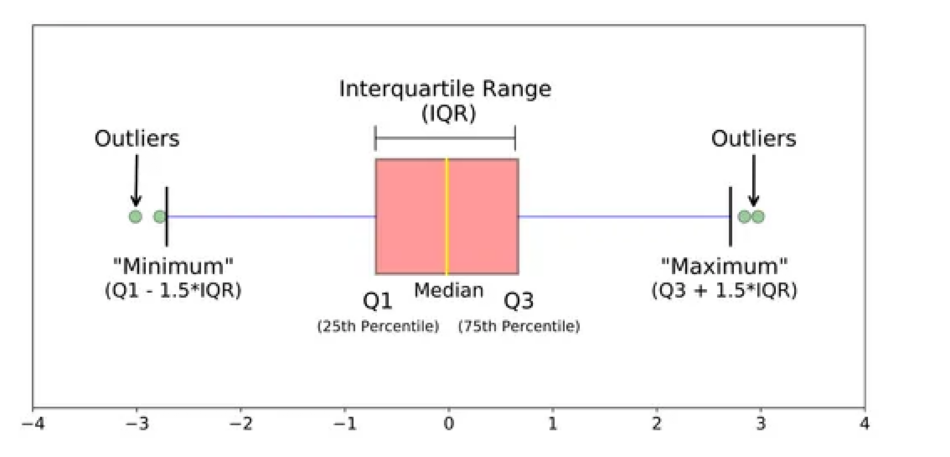

In [44]:
plt.figure(figsize=(12, 6)), plt.imshow(plt.imread("boxplots.png")), plt.axis("off"), plt.show();

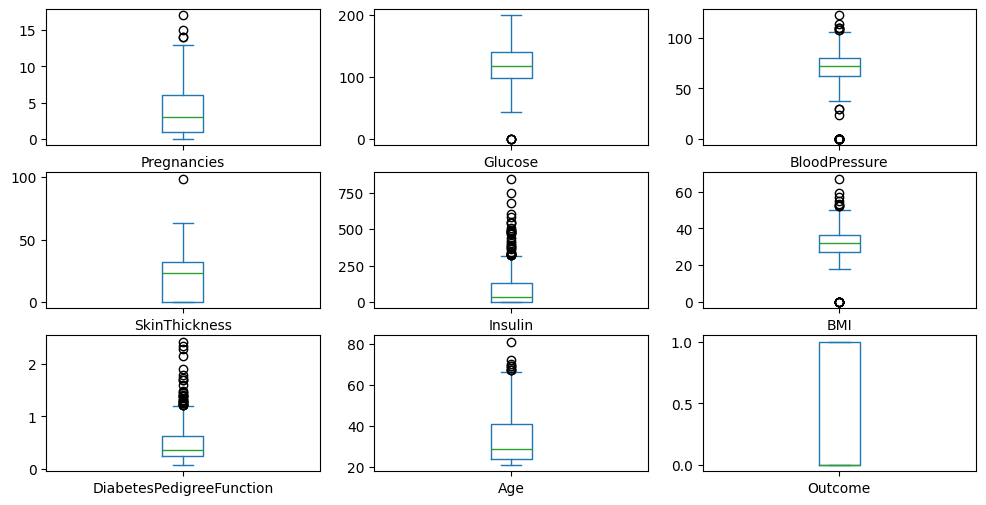

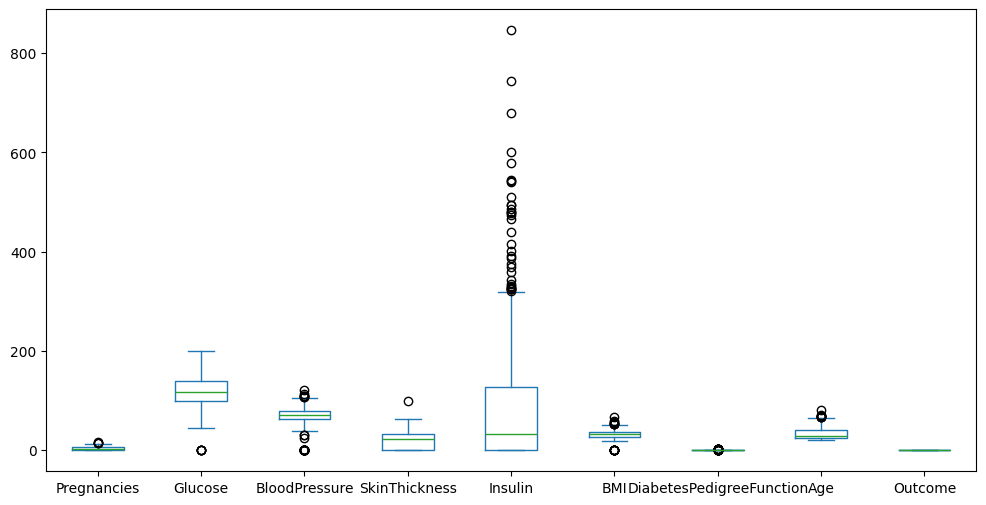

In [48]:
df.plot(kind="box", subplots=True, layout=(3, 3), sharex=False, sharey=False, figsize=(12,6));
df.plot(kind="box", figsize=(12,6));

**Nhận xét**
- Độ trải rộng giữa các thuộc tính khác nhau khá lớn, đặc biệt là các cột Insulin và SkinThickness có phạm vi giá trị rộng và chứa nhiều giá trị ngoại lai (outlier).
- Glucose, BMI và Age có xu hướng lệch phải — phần lớn giá trị tập trung ở mức thấp, nhưng có một số cá thể có giá trị cao bất thường.
- BloodPressure và SkinThickness có phân bố tương đối hẹp hơn, nhưng vẫn xuất hiện một vài điểm ngoại lệ.
- Insulin là thuộc tính có độ biến thiên cao nhất, thể hiện rõ sự không đồng đều trong dữ liệu.
- Pregnancies cũng có xu hướng lệch phải, vì phần lớn người tham gia có số lần mang thai thấp, chỉ một vài trường hợp có giá trị cao.

**Biểu đồ Histogram**

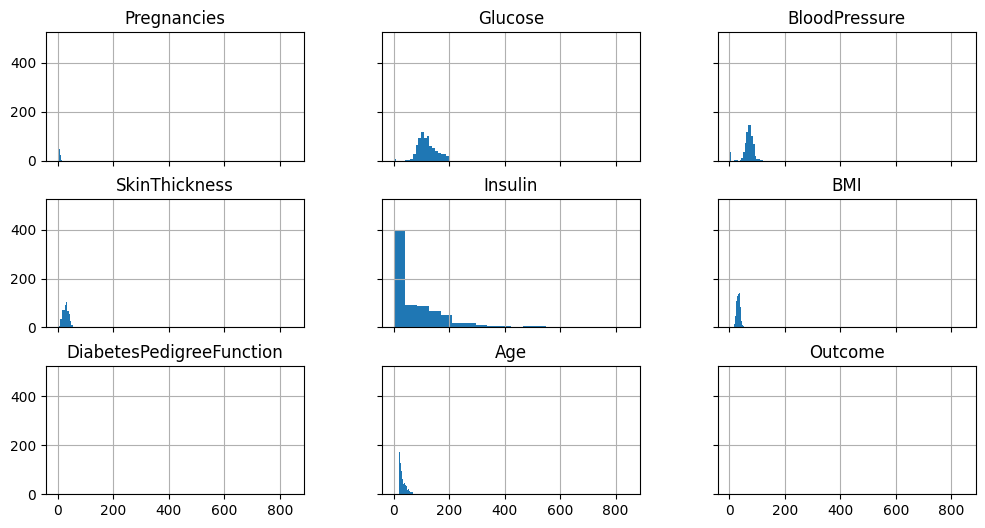

In [55]:
df.hist(figsize=(12, 6), bins = 20, sharex = True, sharey = True);

**Density Plots**

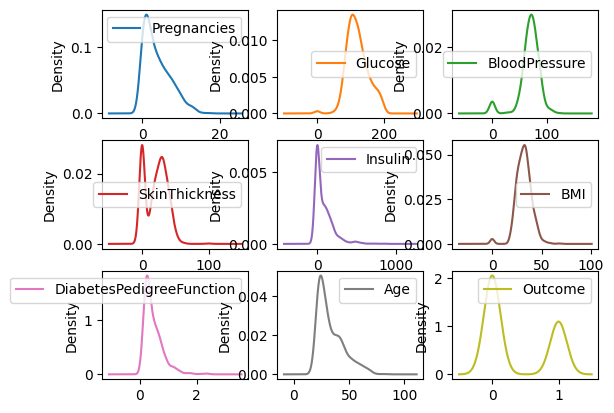

In [58]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False);
plt.show()

**(2) Hiển thị nhiều tính chất (Multivariate Plots) using comparison graphs**
- Scatterplots
- Khái niệm (What?)
    - sử dụng hệ trục tọa độ Descartes (Cartesian coordinates) để hiển thị mối quan hệ giữa hai biến số trong tập dữ liệu.
    - Mỗi điểm trên đồ thị tương ứng với một quan sát (mẫu dữ liệu) có giá trị của hai biến được biểu diễn qua trục X và trục Y.
- Mục đích (Why?)
    - Giúp quan sát mối quan hệ giữa hai thuộc tính — ví dụ như xu hướng tuyến tính, mức độ tương quan, hoặc sự phân tách giữa các nhóm dữ liệu.
- Ví dụ: Hiển thị biểu đồ phân tán giữa **Glucose** và **Insulin** trong bộ dữ liệu bệnh tiểu đường:

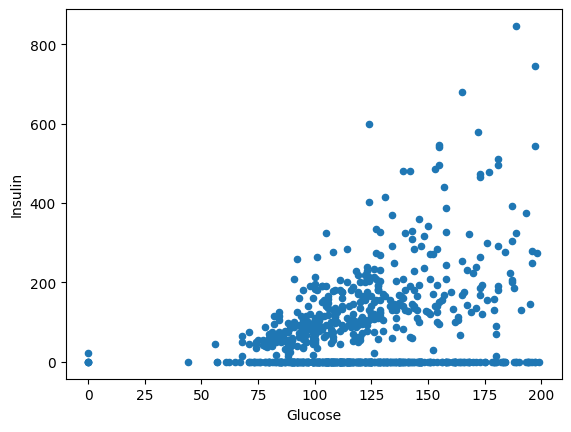

In [59]:
# pandas
df.plot.scatter('Glucose','Insulin');

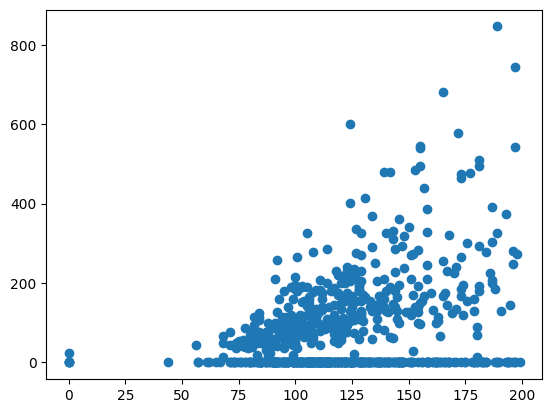

In [60]:
# matplotlib
plt.scatter('Glucose', 'Insulin', data=df);

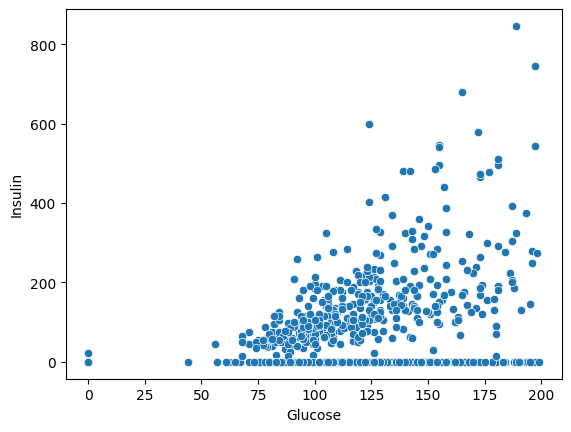

In [61]:
# seaborn
sns.scatterplot(x = df['Glucose'], y = df['Insulin']);
# or sns.scatter('Glucose', 'Insulin', data=df);

<Axes: xlabel='Glucose', ylabel='Insulin'>

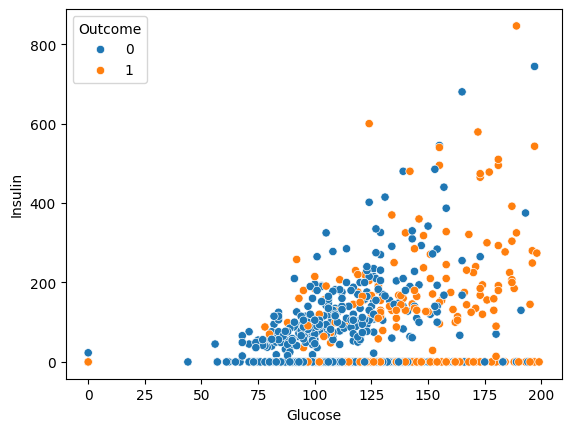

In [63]:
# With respect to the target class (Outcome)
sns.scatterplot(x = 'Glucose', y = 'Insulin', hue=df['Outcome'], data=df)

**Kết luận:**
- Nhóm Outcome = 0 (không mắc tiểu đường) thường có mức Glucose và Insulin thấp hơn.
- Nhóm Outcome = 1 (mắc tiểu đường) có xu hướng nồng độ Glucose cao và Insulin biến động mạnh hơn, thể hiện sự mất cân bằng trong quá trình điều hòa đường huyết.
- Có thể thấy mối quan hệ tích cực giữa Glucose và Insulin, khi giá trị Glucose tăng thì Insulin cũng có xu hướng tăng.
**Lưu ý: Ở các phần tiếp theo, chỉ sử dụng thư viện Seaborn để trực quan hóa dữ liệu; các phương pháp khác bạn có thể tự tìm hiểu thêm.

**Correlogram**

Correlogram: AKS correlation matrix, to analyse the relationship between each pair of numeric variables

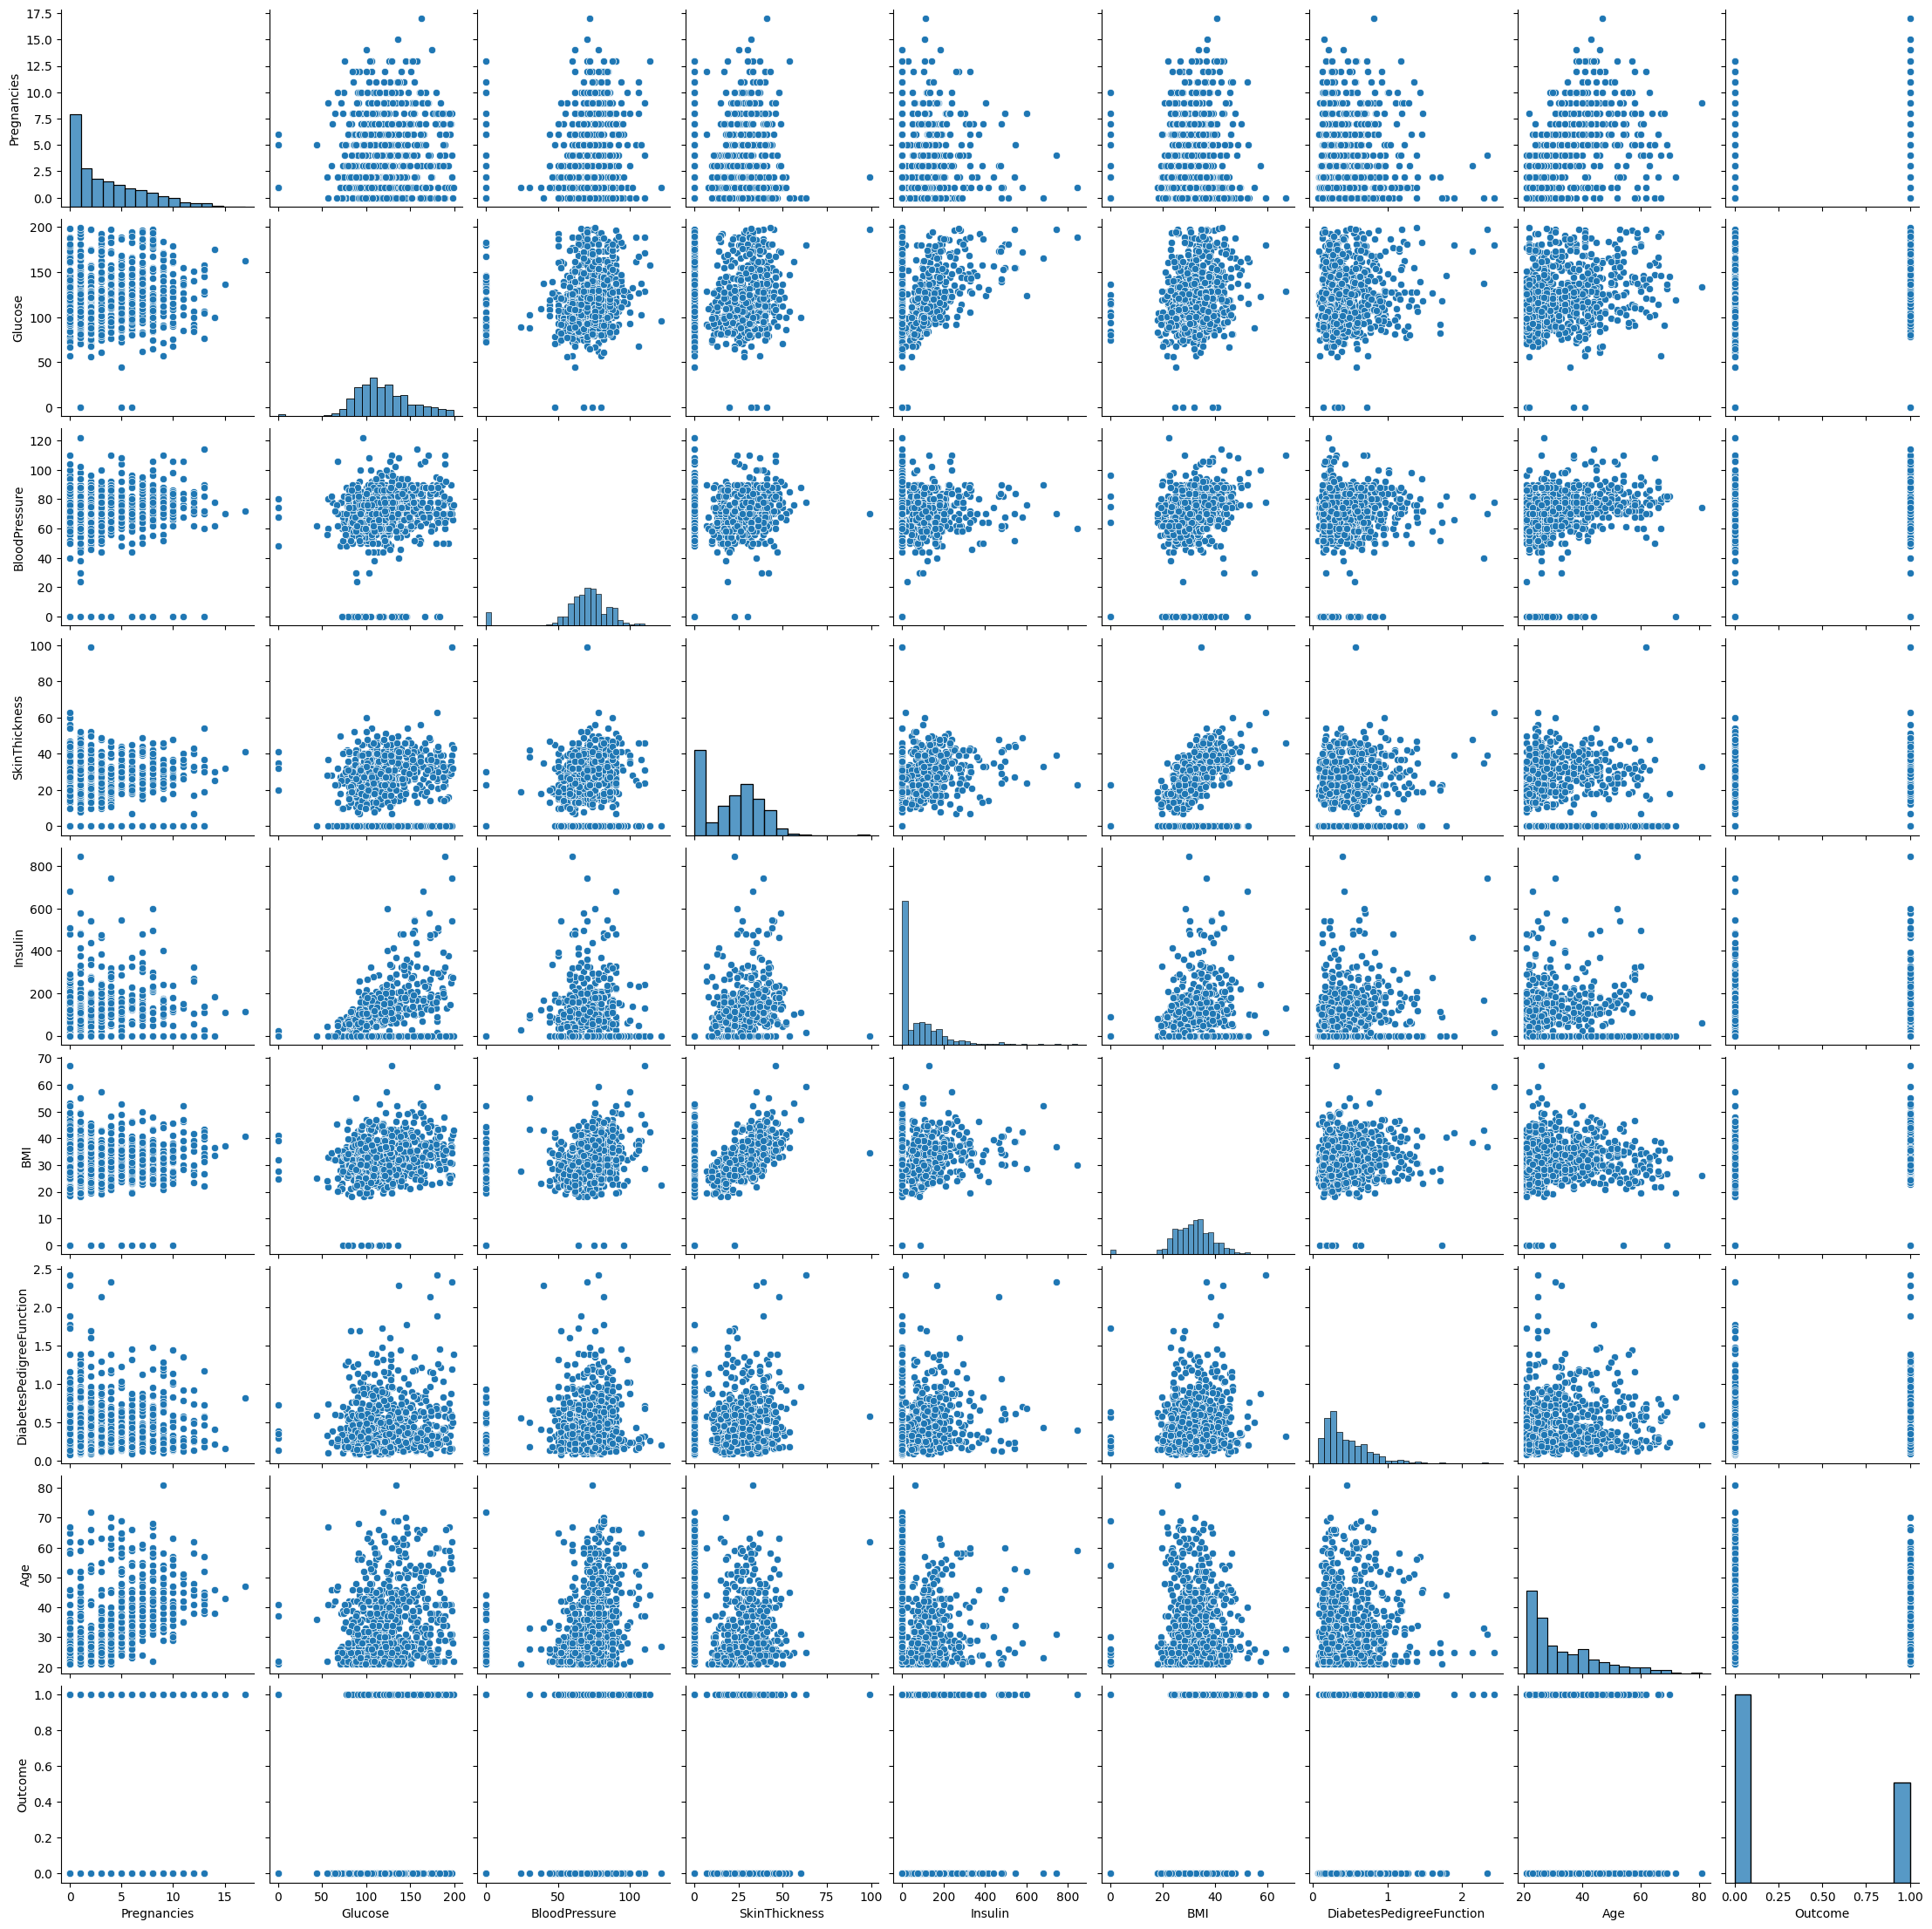

In [66]:
# seaborn
sns.pairplot(df)

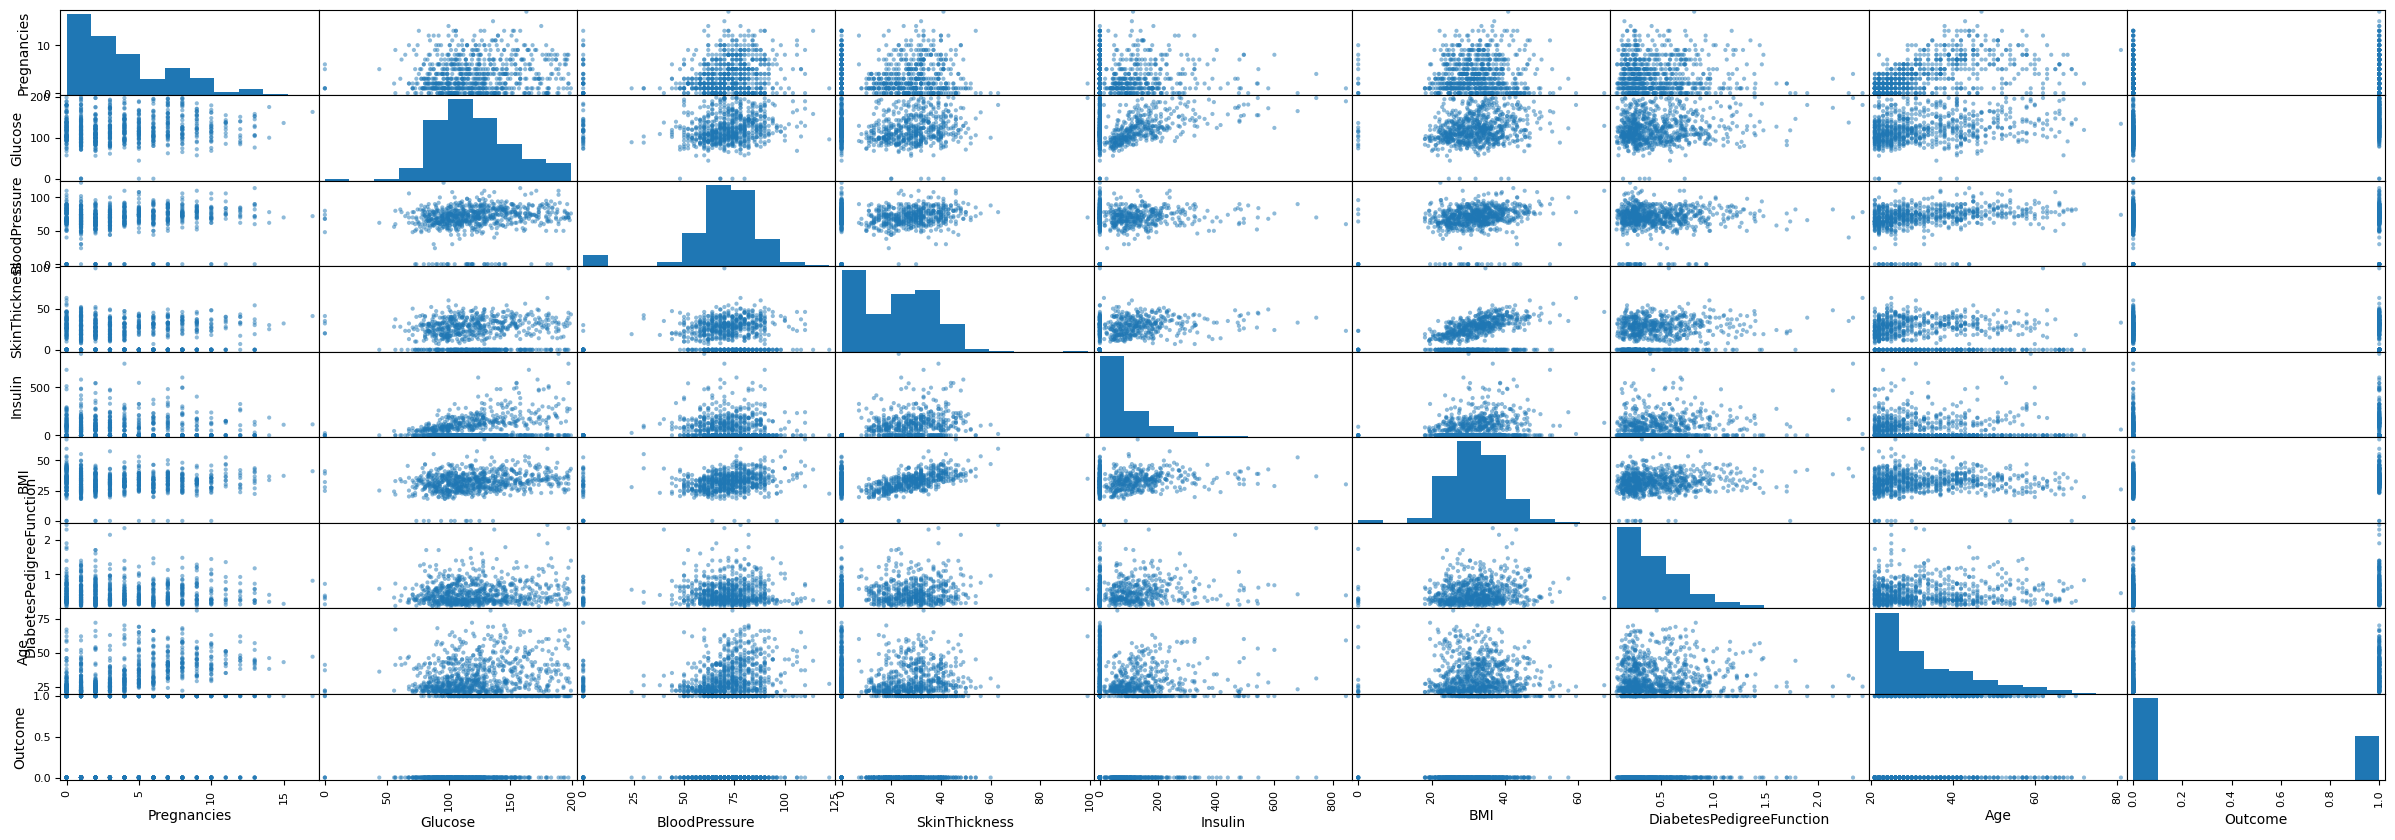

In [70]:
# pandas
pd.plotting.scatter_matrix(df, figsize=(30,10));

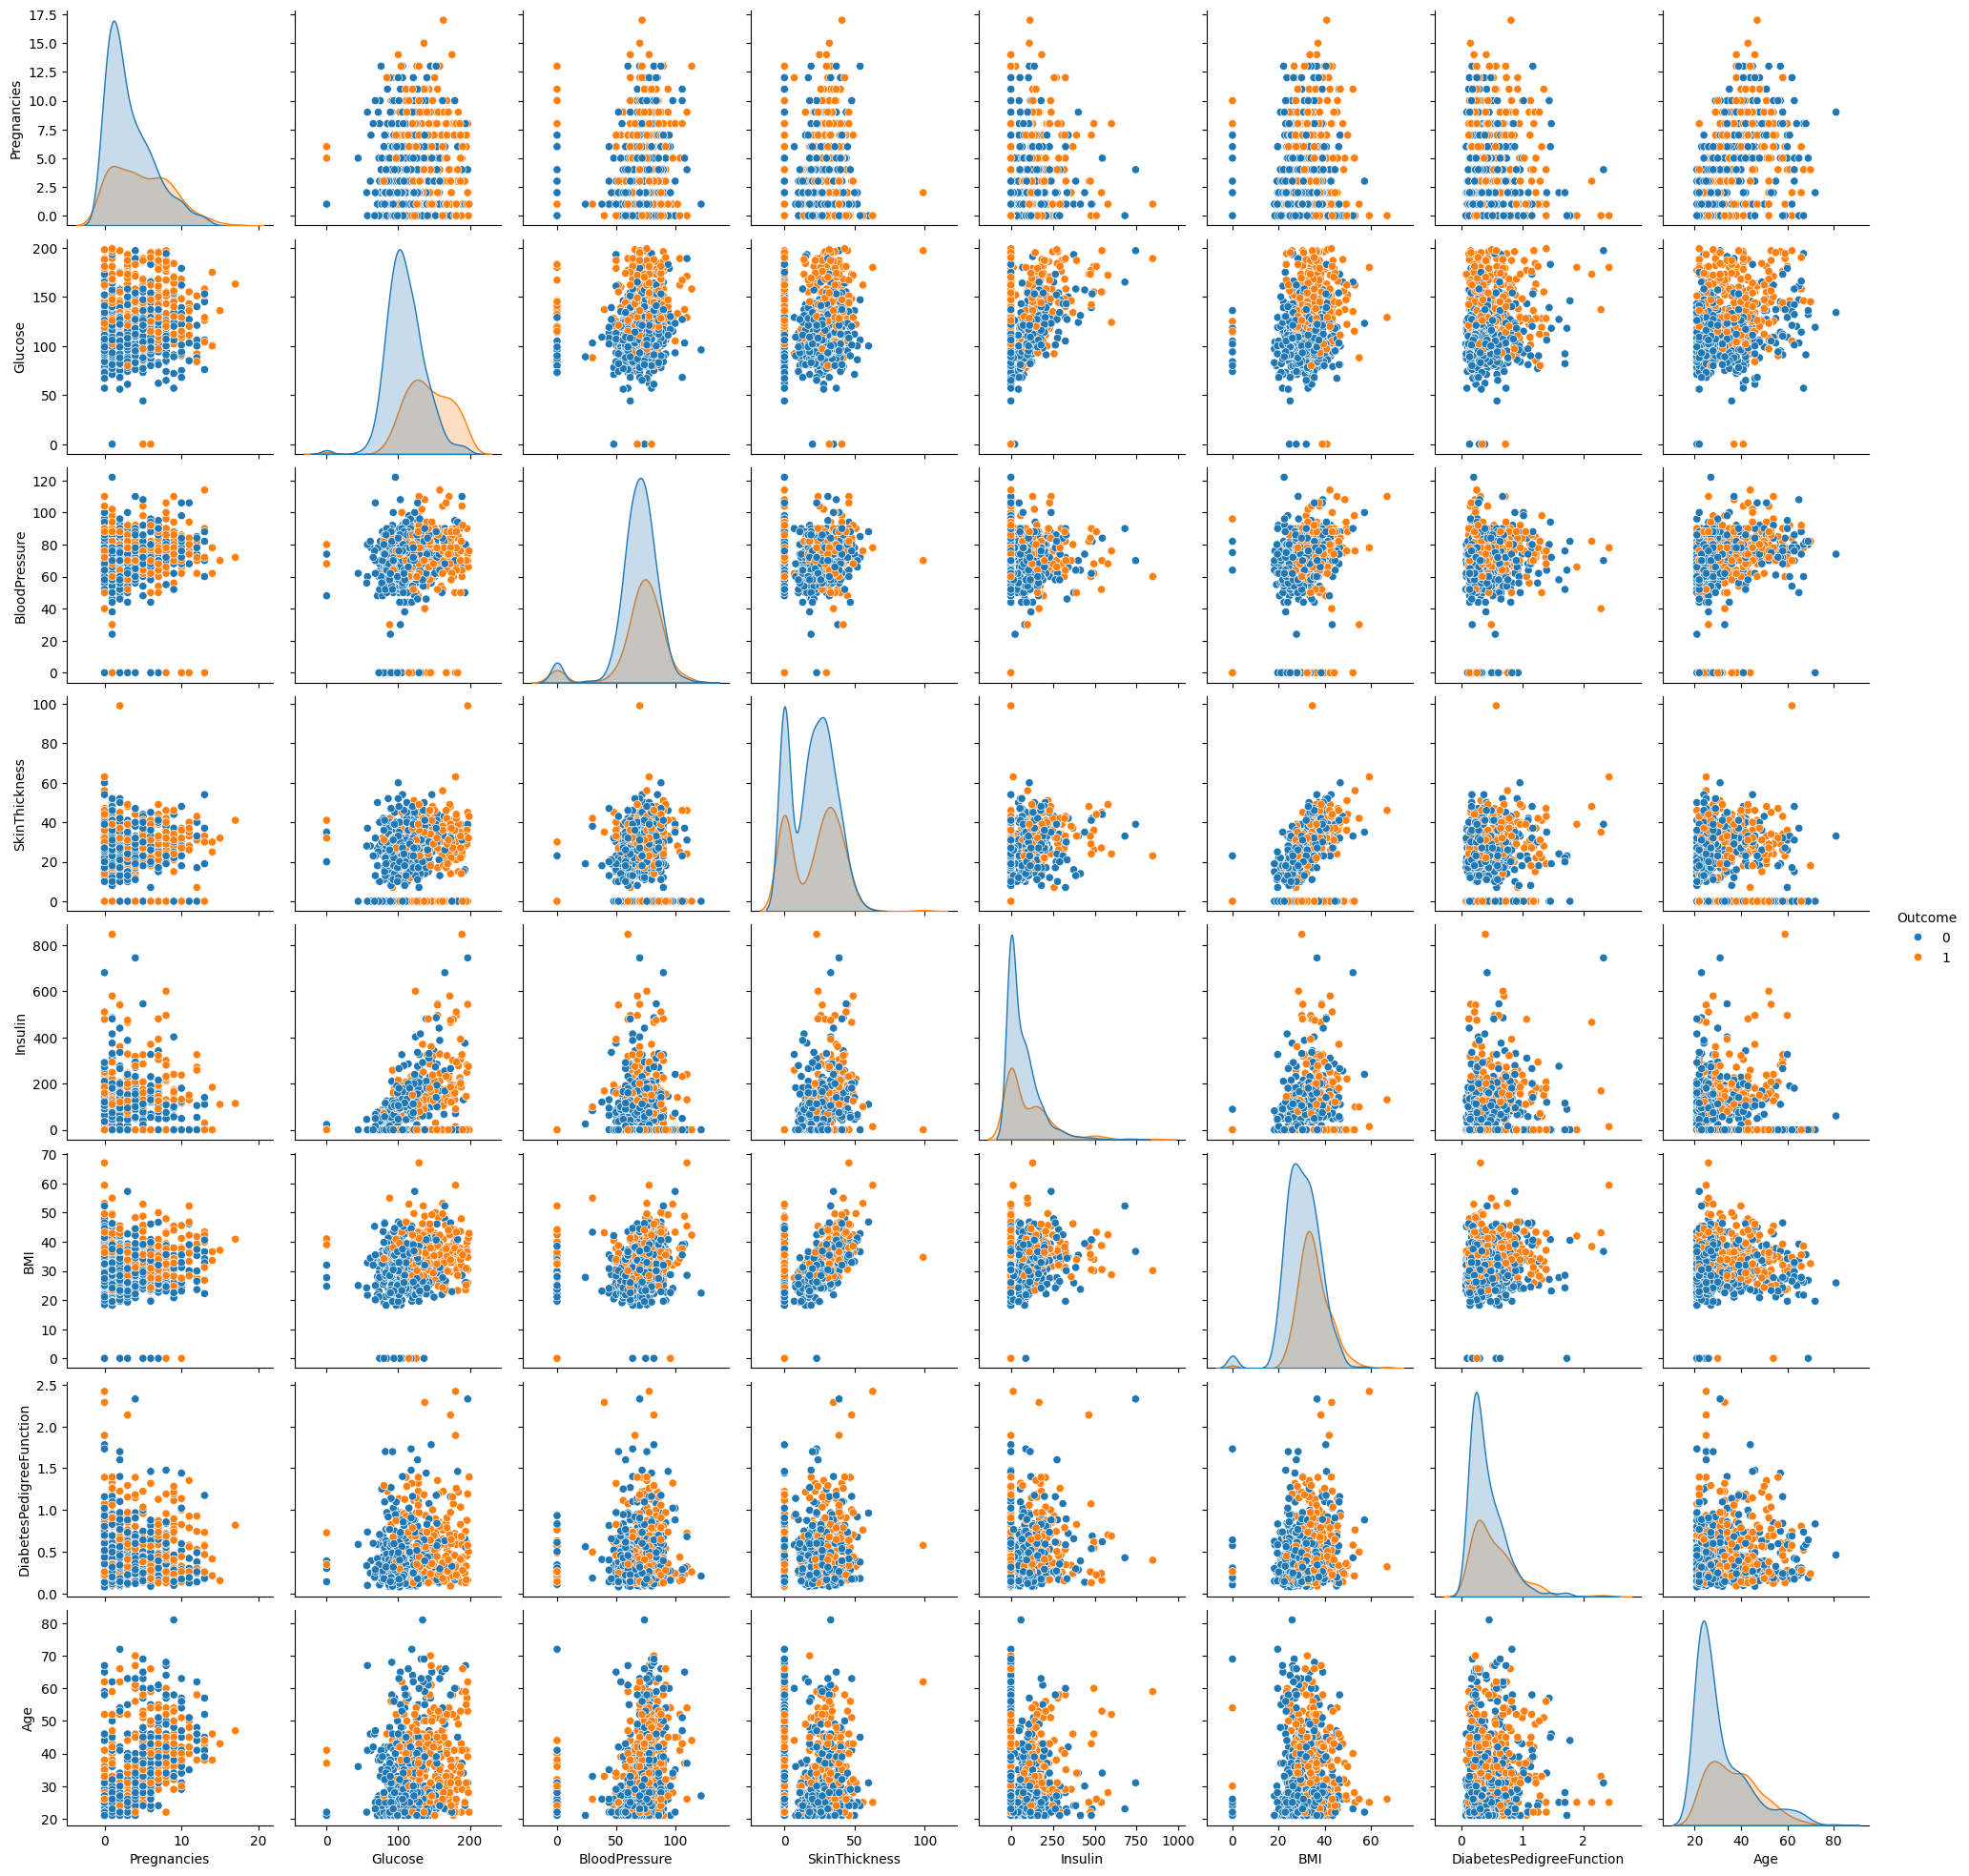

In [71]:
# pairplot with Outcome
sns.pairplot(df, hue="Outcome")

**Nhận xét:**
- Biểu đồ cặp (pairplot) cho thấy có sự phân tách tương đối rõ giữa hai nhóm Outcome (0 và 1) ở một số cặp biến như Glucose – BMI, Glucose – Age, và Glucose – Insulin.
- Người mắc tiểu đường (Outcome = 1) thường có giá trị Glucose cao hơn, đồng thời BMI và Age cũng có xu hướng lớn hơn.
- Một số biến như Pregnancies và DiabetesPedigreeFunction thể hiện sự khác biệt nhẹ giữa hai nhóm.
- Nhìn chung, Glucose là biến có ảnh hưởng mạnh nhất đến khả năng mắc bệnh tiểu đường, trong khi các biến khác góp phần bổ sung trong việc phân loại.

**Heatmap**

Further, we can visualise this correlation using a heatmap.

Heatmap: a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors

useful to see which intersections of the categorical values, have higher concentration of the data compared to the others

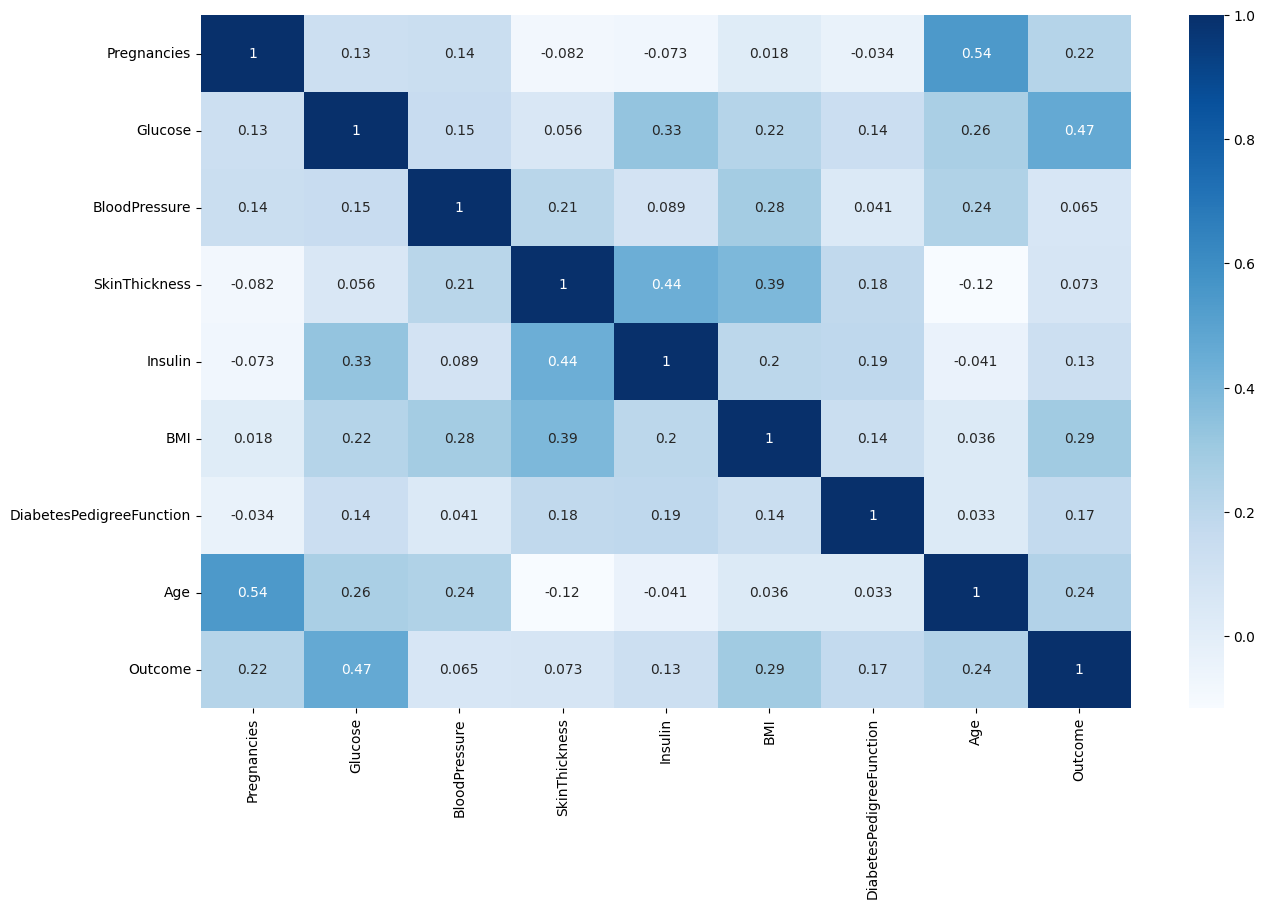

In [73]:
fig = plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), cmap='Blues', annot = True);

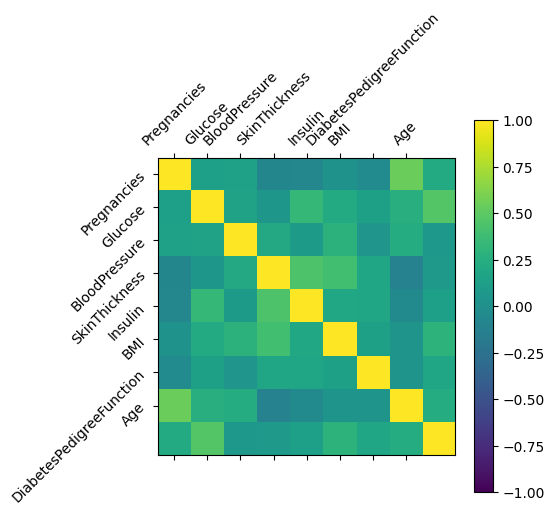

In [77]:
# matplotlib
plt.matshow(correlations,vmin = -1, vmax = 1), plt.colorbar()
plt.xticks(np.arange(0,8), rotation = 45);
plt.yticks(np.arange(0,8), rotation = 45);
plt.gca().set_xticklabels(list(df.columns[:-1]));
plt.gca().set_yticklabels(list(df.columns[:-1]));

Biểu đồ heatmap cho thấy Glucose có tương quan cao nhất với Outcome, tiếp theo là BMI và Age. Điều này cho thấy các yếu tố này ảnh hưởng mạnh đến khả năng mắc bệnh tiểu đường. Các biến còn lại có mức tương quan thấp.

- Các cặp tính chất có độ tương đồng cao:
    - (Prenancies, Age) = 0.544
    - (Glucose, Outcome) = 0.466
    - (SkinThickness, Insulin) = 0.438

**Histograms and distributions**

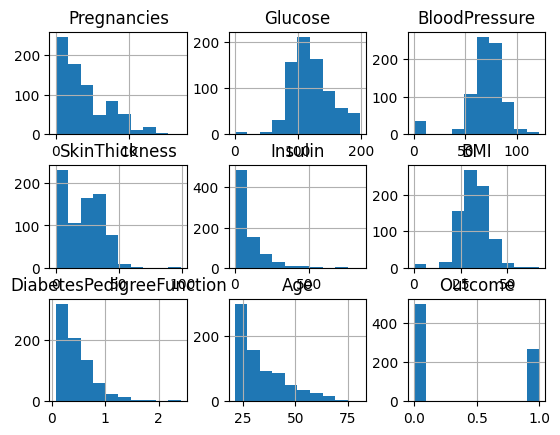

In [78]:
df.hist();

**Correlation with classification label**

<Axes: xlabel='Outcome', ylabel='Glucose'>

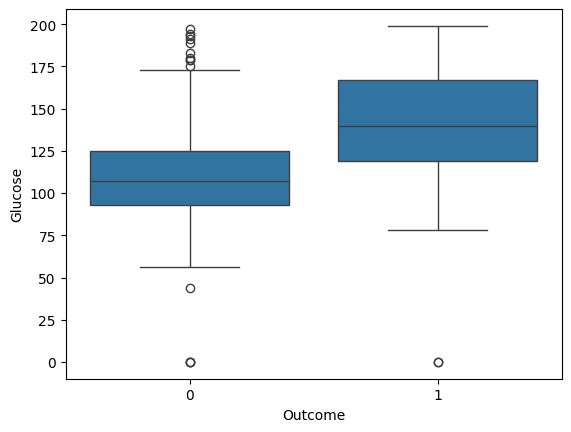

In [80]:
# seaborn
sns.boxplot(x='Outcome', y='Glucose', data=df)

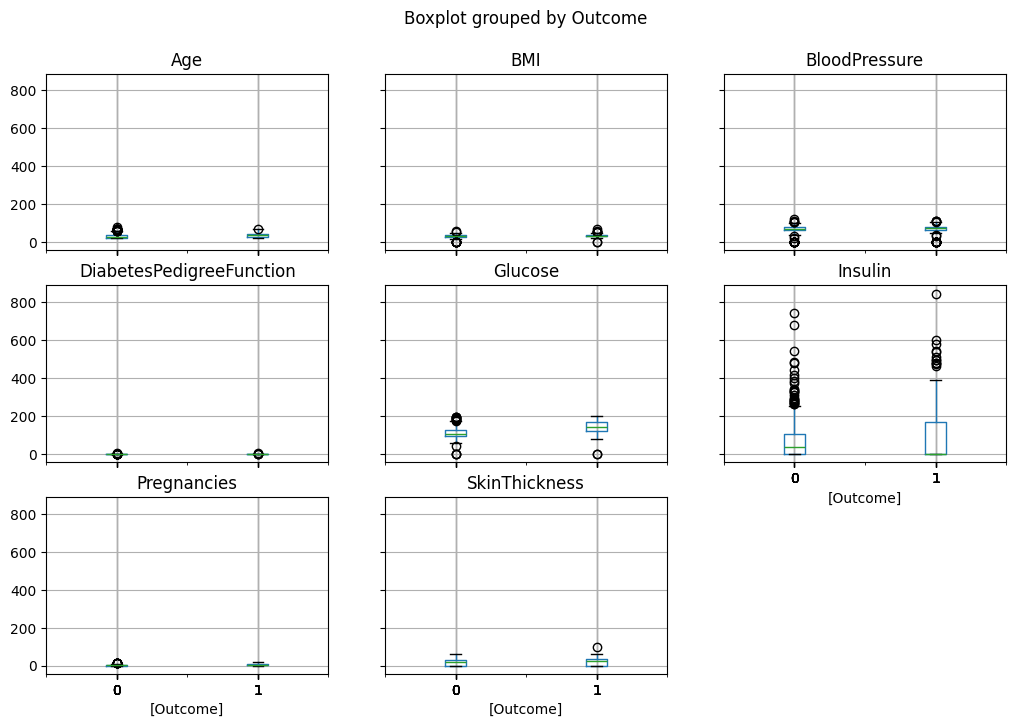

In [82]:
df.boxplot(by="Outcome", figsize=(12, 8));

<Axes: xlabel='Outcome', ylabel='Glucose'>

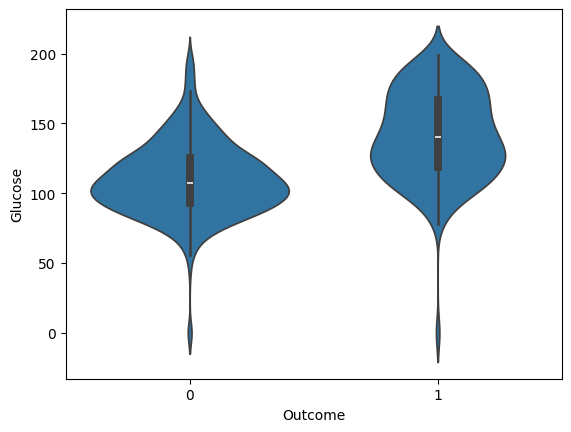

In [83]:
sns.violinplot(x='Outcome', y='Glucose', data=df)

# Kết thúc

In [88]:
import os

cur_dir = os.getcwd() 

html_path = os.path.join(cur_dir, "eda.html")
ipynb_path = os.path.join(cur_dir, "eda.ipynb")

if os.path.exists(html_path):
    os.remove(html_path)

!jupyter nbconvert "{ipynb_path}" --to html

[NbConvertApp] Converting notebook D:\ai_pratice_prj\ex_pima_diabetes\eda\eda.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 25 image(s).
[NbConvertApp] Writing 5690999 bytes to D:\ai_pratice_prj\ex_pima_diabetes\eda\eda.html
